<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab3_1_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Завантаження даних
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

1. Вивести перших 5 рядків.


In [ ]:
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення

In [ ]:
print("\nКількість пропущених значень:")
print(df.isnull().sum())

# Якщо є пропуски, заміняємо їх на середнє значення
df = df.fillna(df.mean())


Кількість пропущених значень:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити

In [ ]:
print(f"\nКількість дублікатів: {df.duplicated().sum()}")
df = df.drop_duplicates()


Кількість дублікатів: 0


4. Замінити бінарні ознаки. У стовпчику «Вік» спочатку перевірте
унікальні значення.

In [ ]:
print("\nУнікальні значення у стовпчику 'age':")
print(df['age'].unique())


Унікальні значення у стовпчику 'age':
[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


5. Перевірити тип даних. При необхідності замінити тив даних на
числовий.

In [ ]:
print("\nТипи даних:")
print(df.dtypes)



Типи даних:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.


Кореляція з цільовою змінною:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


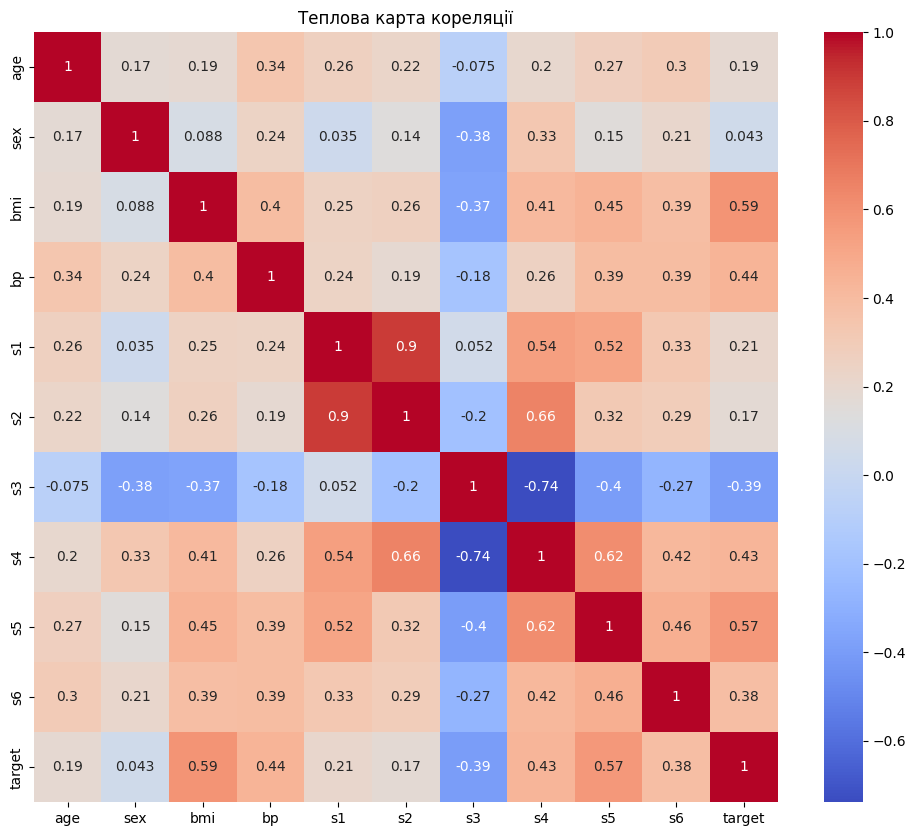

In [ ]:
correlation = df.corr()['target'].sort_values(ascending=False)
print("\nКореляція з цільовою змінною:")
print(correlation)

# Побудова теплової карти кореляції
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()


7. Масштабувати ознаки

In [ ]:
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']
X_scaled = scaler.fit_transform(X)

8. Поділити дані на тренувальну і тестову вибірки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптисальне число).

In [ ]:
top_features = correlation.index[1:6]  # Перший елемент - сама цільова змінна
X_top = X[top_features]
X_top_scaled = scaler.fit_transform(X_top)
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Лінійна регресія
lr = LinearRegression()
lr.fit(X_train_top, y_train)
y_pred_lr = lr.predict(X_test_top)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_top, y_train)
y_pred_rf = rf.predict(X_test_top)


10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.

In [ ]:
print("\nЛінійна регресія:")
print(f"R2 score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")

print("\nRandom Forest:")
print(f"R2 score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")


Лінійна регресія:
R2 score: 0.4527
MSE: 2899.7427

Random Forest:
R2 score: 0.4175
MSE: 3086.4159


11. Побудувати графіки.

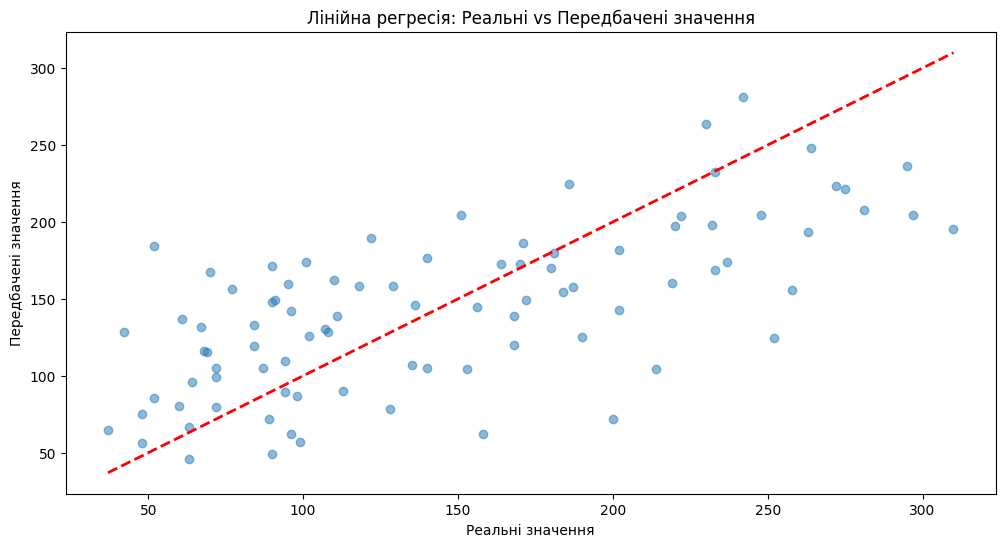

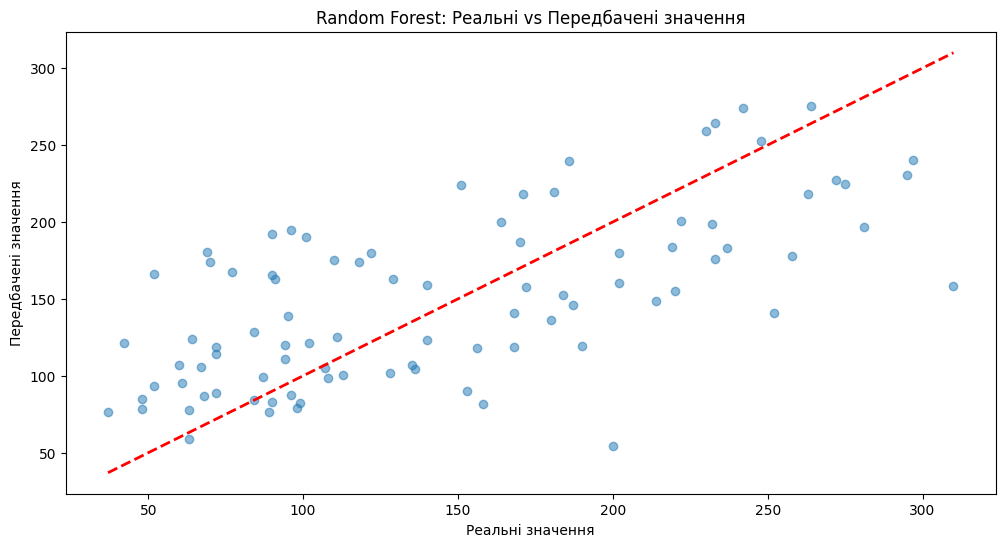

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')
plt.title('Лінійна регресія: Реальні vs Передбачені значення')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')
plt.title('Random Forest: Реальні vs Передбачені значення')
plt.show()


**На основі наданих результатів можна зробити наступні висновки:**
Аналіз датасету Diabetes виявив ключові фактори, що впливають на прогрес захворювання. Найбільш корельованими з прогресом діабету виявилися індекс маси тіла (BMI, 0.586), s5 (0.566) та артеріальний тиск (BP, 0.441). Це підкреслює важливість контролю ваги та артеріального тиску у пацієнтів з діабетом.
Порівняння моделей лінійної регресії та Random Forest показало, що лінійна регресія демонструє дещо кращі результати з R2 score 0.4527 проти 0.4175 у Random Forest, та меншою середньоквадратичною помилкою (MSE 2899.74 проти 3086.42). Це свідчить про наявність лінійних залежностей між ознаками та прогресом діабету, хоча точність прогнозування є помірною.

Графічний аналіз підтвердив, що обидві моделі мають схожу продуктивність, з деяким розкидом прогнозів навколо ідеальної лінії. Лінійна регресія показує більш рівномірний розподіл помилок, тоді як Random Forest має тенденцію до переоцінки низьких значень та недооцінки високих.
Загалом, дослідження підкреслює важливість контролю ваги, рівня глюкози (ймовірно, s5 відноситься до цього показника) та артеріального тиску у пацієнтів з діабетом. Моделі демонструють помірну здатність прогнозувати
прогрес захворювання, що може бути корисним для раннього виявлення ризиків. Для покращення результатів рекомендується розглянути можливість включення додаткових факторів, таких як дієта та фізична активність, а також використання більш складних моделей машинного навчання або ансамблевих методів.